# **Programming for Data Science Final Project**

**Student Information:**

StudentID|Full Name
-|-
21127175|Le Anh Thu
21127693|Huynh Duc Thien


## **Table of contents**

1. [Collecting Data](#collect) 

    a. [About Dataset](#about)
   
    b. [License and Copyright](#license)
   
    c. [How did authors collect data?](#howtocollect) 
    
2. [Exploring Data Analysis (EDA)](#eda)

   a. [Overall Data View](#overall)
   
   b. [Row Detail](#row)
   
   c. [Column Detail](#column)
   
   d. [Distribution Values](#distribution)

3. [Asking Meaning Questions](#ask)

   a. [Question 1](#question1)
   
   b. [Question 2](#question2)

4. [Pre-processing & Analyzing Data to Answer each Questions](#pre&anal)

5. [Reflection](#reflection)

    [References](#references)

## **1. Collecting Data** <a name="collect"></a>

### **a. About Dataset** <a name="about"></a>

- **Heart failure**, a common consequence of **Cardiovascular diseases** (CVDs), is addressed in this [dataset](#https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction), encompassing **11 distinct features** that enable the prediction of potential heart disease.

<center>
    <img src="Image/Cardiovascular-Disease.png" width="500">
</center>


- Early detection and management are crucial for individuals with cardiovascular disease or those at high cardiovascular risk, stemming from risk factors such as hypertension, diabetes, hyperlipidemia, or pre-existing medical conditions. In this context, the utilization of a machine learning model can prove invaluable.

### **b. License and Copyright** <a name="license"></a>

- **Creators & Donor**:
    1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
    2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
    3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
    4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
    5. David W. Aha (aha '@' ics.uci.edu)


- **License:** [Open Data Commons Open Database Licnse (ODbL) v1.0](https://opendatacommons.org/licenses/odbl/1-0/). This copyright allows us to use and includes without limitation distributing, copying, publicly performing, publicly displaying, and preparing derivative works of the Database, as well as modifying the Database as may be technically necessary to use it in a different mode or format. (*quote section 1.0 section "Use"*)

### **c. How did authors collect data?** <a name="howtocollect"></a>

This dataset was generated by consolidating multiple previously separate datasets that had not been merged previously. It comprises the combination of five heart-related datasets, all sharing 11 common features. This compilation results in the largest dataset for heart disease research to date. The five source datasets used for this compilation are as follows:

1. **Cleveland**: 303 observations
2. **Hungarian**: 294 observations
3. **Switzerland**: 123 observations
4. **Long Beach VA**: 200 observations
5. **Stalog (Heart) Data Set**: 270 observations

In total, there were 1190 observations across these datasets. After removing duplicate entries (272 observations), the final dataset consists of **918 unique observations**.

## **2. Exploring Data Analysis (EDA)** <a name="eda"></a>

**Import necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

warnings.simplefilter(action='ignore', category=FutureWarning)

### **a. Overall Data View** <a name="overall"></a>

**Read data**

In [2]:
df = pd.read_csv('Data/heart.csv')

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Data shape**

In [4]:
rows, cols = df.shape

print(f'Number of rows: {rows}')
print(f'Number of cols: {cols}')

Number of rows: 918
Number of cols: 12


There is total of 918 rows and 12 columns in the dataset.

### **b. Row Detail** <a name="row"></a>

**Rows meaning** 

The dataset comprises health information for individual patients, with each row corresponding to a unique patient record. Each record contains a comprehensive set of health-related data for an individual, allowing for a detailed examination of various aspects of patient well-being. The dataset is structured such that each row represents a holistic snapshot of a patient's health profile, facilitating a thorough analysis of health conditions and factors specific to each individual.

**Checking duplicate**

In [5]:
dup_rows = df[df.duplicated()]

print(f'Number of duplicated rows: {len(dup_rows)}')

Number of duplicated rows: 0



The data has no duplicates, indicating that our dataset is relatively sound.

### **c. Column Detail** <a name="column"></a>

**Columns meaning**

In [6]:
descriptions = pd.read_csv('Data/description.csv')

pd.set_option('display.max_colwidth', None)
descriptions

,Feature,Meaning
0,Age,Age of the patient [years]
1,Sex,"Sex of the patient [M: Male, F: Female]"
2,ChestPainType,"Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]"
3,RestingBP,Resting blood pressure [mm Hg]
4,Cholesterol,Serum cholesterol [mm/dl]
5,FastingBS,"Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]"
6,RestingECG,"Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]"
7,MaxHR,Maximum heart rate achieved [Numeric value between 60 and 202]
8,ExerciseAngina,"Exercise-induced angina [Y: Yes, N: No]"
9,Oldpeak,Oldpeak = ST [Numeric value measured in depression]


In [7]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

The data types for each column are displayed above. However, there are inappropriate categorical columns, namely 'FastingBS' and 'HeartDisease', as they are represented using numeric values. This could lead to undesirable outcomes in subsequent processing. To address this issue, we have converted them into more suitable types, mapping the values as follows:

- For 'FastingBS': 1 -> 'Y', 0 -> 'N'
- For 'HeartDisease': 1 -> 'Y', 0 -> 'N'

**Reformat categorical column in numeric types**

In [8]:
df['FastingBS'] = df['FastingBS'].map({1: 'Y', 0: 'N'})
df['HeartDisease'] = df['HeartDisease'].map({1: 'Y', 0: 'N'})
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS          object
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease       object
dtype: object

**Detail column types**

In [9]:
first_row = df.iloc[0]

types = {'column': [], 'type': []}
for col, val in first_row.items():
    types['column'].append(col)
    types['type'].append(type(val))

types_df = pd.DataFrame(types)
types_df['type'] = types_df['type'].astype(str).str.split("'").str[1]

types_df

,column,type
0,Age,numpy.int64
1,Sex,str
2,ChestPainType,str
3,RestingBP,numpy.int64
4,Cholesterol,numpy.int64
5,FastingBS,str
6,RestingECG,str
7,MaxHR,numpy.int64
8,ExerciseAngina,str
9,Oldpeak,numpy.float64


### **d. Distribution Value** <a name="distribution"></a>

#### **Distribution of numeric values**

**Description** </br>

For columns with numeric data types, we calculate:
- `missing_ratio`: Percentage (from 0 to 100) of missing values
- `standard_deviation`: Standard deviation
- `min`: The min
- `lower_quartile`: The lower quartile 
- `median`: The median
- `upper_quartile`: The upper quartile
- `max`: The max

For ease of viewing, we round all values to 1 decimal place using the `.round(1)` method.

In [10]:
num_col_df = df.select_dtypes(exclude='object')

def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)

def median(df):
    return (df.quantile(0.5)).round(1)

def lower_quartile(df):
    return (df.quantile(0.25)).round(1)

def upper_quartile(df):
    return (df.quantile(0.75)).round(1)

def standard_deviation(s):
    return round(s.std(), 1) if not pd.isna(s.std()) else None

num_col_info_df = num_col_df.agg([missing_ratio, standard_deviation, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
missing_ratio,0.0,0.0,0.0,0.0,0.0
standard_deviation,9.4,18.5,109.4,25.5,1.1
min,28.0,0.0,0.0,60.0,-2.6
lower_quartile,47.0,120.0,173.2,120.0,0.0
median,54.0,130.0,223.0,138.0,0.6
upper_quartile,60.0,140.0,267.0,156.0,1.5
max,77.0,200.0,603.0,202.0,6.2


In [11]:
print(f'mean missing_ratio: {num_col_info_df.iloc[0].mean()}')

mean missing_ratio: 0.0


- The percentage of missing value in numeric columns is 0%.
- The range value of each columns: </br>

>'Age': (28, 77) </br>
'RestingBP': (0, 200) </br>
'Cholesterol': (0, 603) </br>
'MaxHR': (60, 202) </br>
'Oldpeak': (-2.6, 6.2) </br>

- With the exception of 'Oldpeak,' all columns exhibit a wide range of values, indicating that there are possibly many outliers in the above factors.

**&rarr; The numerical columns have been cleaned and are now prepared for further processing.**

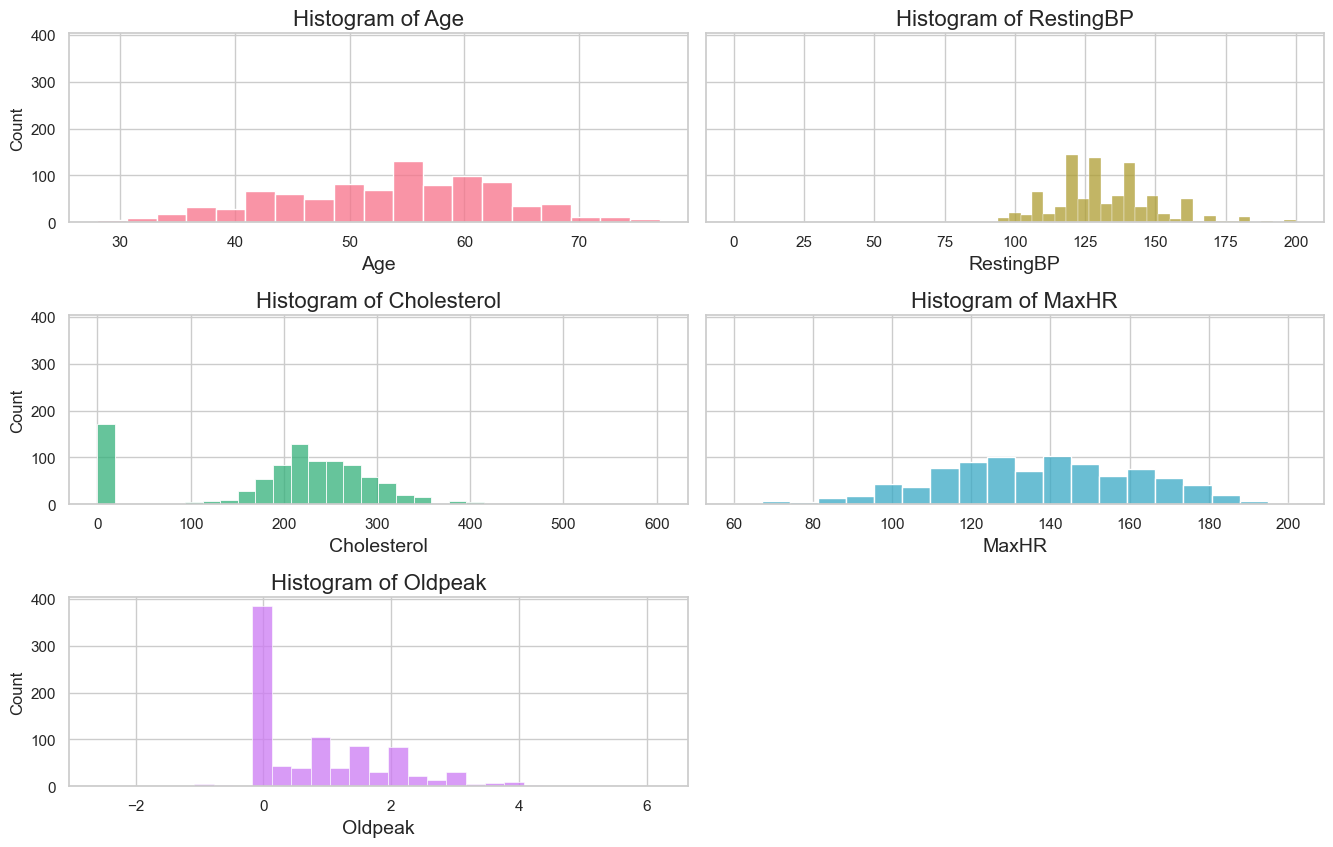

In [12]:
sns.set(style="whitegrid")

num_cols = len(num_col_df.columns)
charts_per_row = 2
num_rows = (num_cols - 1) // charts_per_row + 1

fig, axes = plt.subplots(num_rows, charts_per_row, figsize=(12, 5 * num_rows), sharey='all')
axes = axes.flatten()

plt.subplots_adjust(wspace=0.5)

colors = sns.color_palette('husl', num_cols)

for i, col in enumerate(num_col_df.columns):
    row_index = i // charts_per_row
    col_index = i % charts_per_row

    size = 2 + i % 3
    sns.histplot(num_col_df[col], color=colors[i], kde=False, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}', fontsize=16)
    axes[i].set_xlabel(col, fontsize=14)
    axes[i].figure.set_size_inches(size * 3, size * 3)

for i in range(num_cols, num_rows * charts_per_row):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 1.5, 0.96]) 
plt.show()

**Observations**

- After transforming certain categorical features into a more transparent format, we are left with only five numeric columns: `Age`, `RestingBP`, `Cholesterol`, `MaxHR`, and `Oldpeak`.

- Notably, the missing ratio for all the aforementioned features is 0, underscoring the cleanliness of our data. This suggests a meticulous collection process in the medical field, minimizing the likelihood of abnormal values.

- It becomes apparent that the numeric features exhibit weak interconnections. They demonstrate a high degree of independence from each other, with each column providing crucial and distinct information about the patient's health.

- We can observe that the age group most susceptible to heart-related diseases, specifically heart failure, falls within the middle to elderly age range. During this phase, the body begins to age, exhibiting signs of health decline and decreased immunity.

- It is notable that `Oldpeak` and `Cholesterol` features have a strange distribution, there are values in the left that is extremely differ from other value, this may be considered outliers.



#### **Distribution of categorical values**

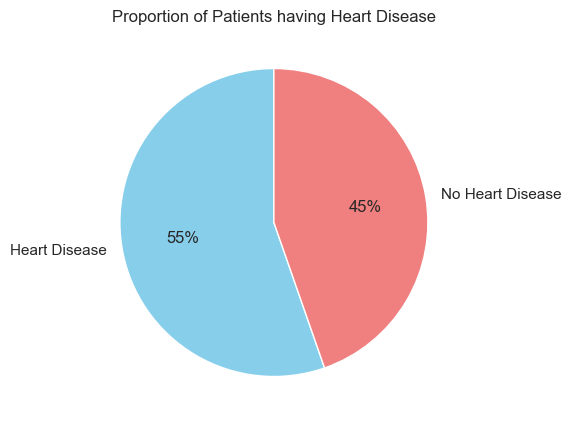

In [13]:
colors = sns.color_palette('pastel')[0:5]
heart_disease_counts = df['HeartDisease'].value_counts()

plt.figure(figsize=(10, 5))
plt.pie(heart_disease_counts, labels=['Heart Disease', 'No Heart Disease'], autopct='%.0f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Proportion of Patients having Heart Disease')
plt.show()

The proportion is quite equal for both classes, this is a balanced dataset.

For other columns containing non-numeric data types, we compute the following:

- `missing_ratio`: The percentage of missing values, ranging from 0 to 100.

- `num_values`: The count of distinct values (excluding missing values). For categorical columns, this represents a finite set of categories.

- `value_ratios`: The sorted percentages (ranging from 0 to 100) of each unique value in descending order. The computation disregards missing values, and the ratio is based on the count of non-missing values. We employ a dictionary to store this information, where the keys are the unique values, and the corresponding values are their respective percentages.

In [14]:
cat_col_df = df.select_dtypes(include='object').drop(['HeartDisease'], axis=1)

def missing_ratio(s):
    return (s.isna().mean() * 100).round(1)

def num_values(s):
    s = s.str.split(';')
    s = s.explode()
    return len(s.value_counts())

def value_ratios(s):
    s = s.str.split(';')
    s = s.explode()
    totalCount = (~s.isna()).sum()
    return ((s.value_counts()/totalCount*100).round(1)).to_dict()

cat_col_info_df = cat_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0
num_values,2,4,2,3,2,3
value_ratios,"{'M': 79.0, 'F': 21.0}","{'ASY': 54.0, 'NAP': 22.1, 'ATA': 18.8, 'TA': 5.0}","{'N': 76.7, 'Y': 23.3}","{'Normal': 60.1, 'LVH': 20.5, 'ST': 19.4}","{'N': 59.6, 'Y': 40.4}","{'Flat': 50.1, 'Up': 43.0, 'Down': 6.9}"


In [15]:
print(f'mean missing_ratio: {cat_col_info_df.iloc[0].mean()}')

mean missing_ratio: 0.0


- The percentage of missing value in categorical columns is 0%.
- For each column, the values distribue as follow:

> Sex: 'M' - 79.0, 'F': 21.0	</br>
ChestPainType - 'ASY': 54.0, 'NAP': 22.1, 'ATA': 18.8, 'TA': 5.0	</br>
FastingBS - 'N': 76.7, 'Y': 23.3</br>
RestingECG - 'Normal': 60.1, 'LVH': 20.5, 'ST': 19.4</br>
ExerciseAngina - 'N': 59.6, 'Y': 40.4</br>
ST_Slope - 'Flat': 50.1, 'Up': 43.0, 'Down': 6.9</br>

- In the columns, it can be observed that the majority of values have uneven proportions and typically vary between 20% to 60% among different groups.

**&rarr; The categorical columns have been cleaned and are now prepared for further processing.**

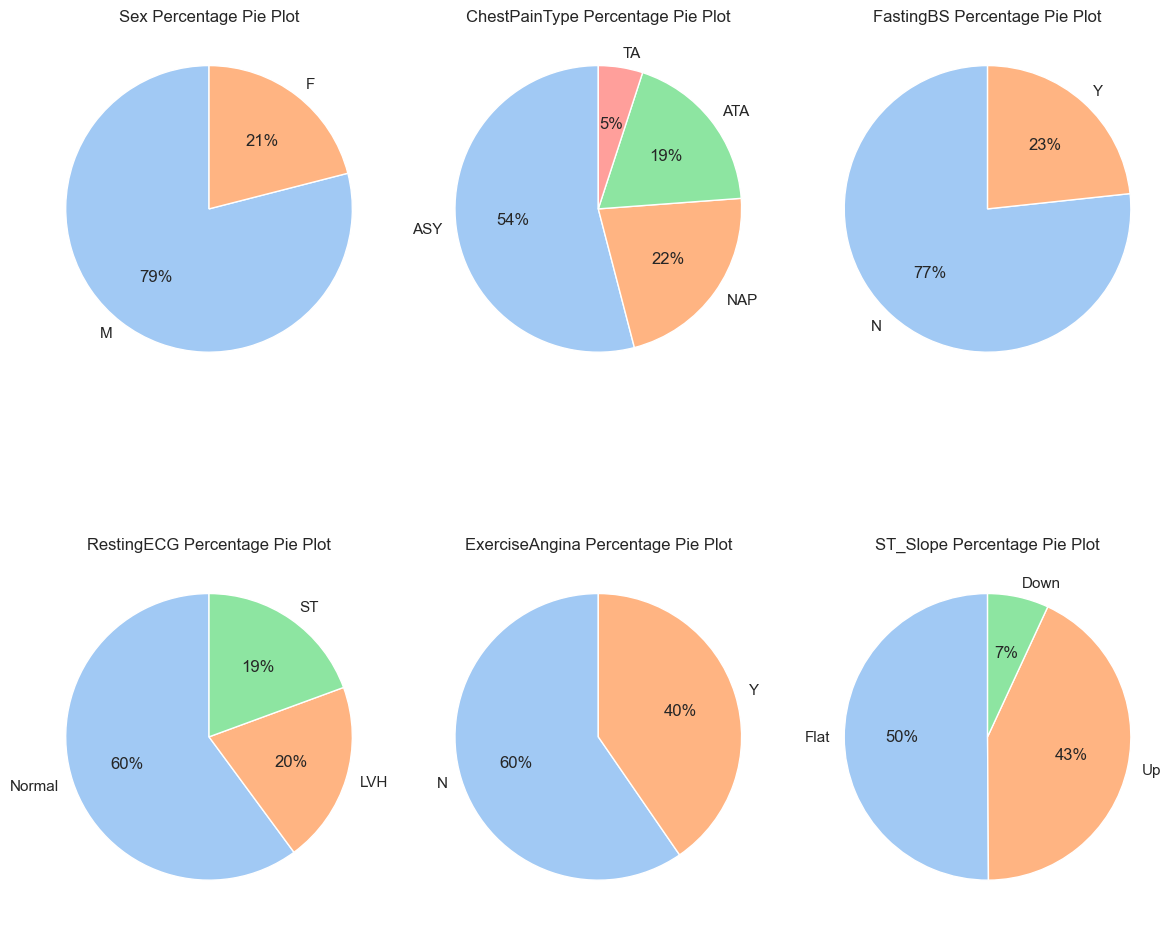

In [16]:
colors = sns.color_palette('pastel')[0:5]

num_cols = len(cat_col_df.columns)
charts_per_row = 3
num_rows = -(-num_cols // charts_per_row)

fig, axes = plt.subplots(num_rows, charts_per_row, figsize=(12, 6*num_rows), sharex='all', sharey='all')

for i, col in enumerate(cat_col_df.columns):
    labels = cat_col_info_df[col].value_ratios.keys()
    ratio_data = cat_col_info_df[col].value_ratios.values()

    row_index = i // charts_per_row
    col_index = i % charts_per_row

    axes[row_index, col_index].pie(ratio_data, labels=labels, colors=colors, autopct='%.0f%%', startangle=90)
    axes[row_index, col_index].set_title(f'{col} Percentage Pie Plot')

plt.tight_layout()
plt.show()

**Observations**

- There are more categorical features in this dataset, totaling 7 columns, including `Sex`, `ChestPainType`, `FastingBS`, `RestingECG`, `ExerciseAngina`, `ST_Slope`, and `HeartDisease`.

- For these columns, the missing ratio is 0, indicating that the data in these columns is relatively sound.

- The gender distribution in the statistics shows a relatively high discrepancy, nearly four times higher for one gender compared to the other. As for the confirmed cases of heart disease, the count is higher compared to non-cases, although the difference is not substantial.

## **3. Asking Meaning Questions** <a name="ask"></a>

**Question 1:** How does the incidence of heart disease vary across different age groups and genders? 

**Benefits**: Understanding the distribution of heart disease across diverse age groups and genders is essential for tailoring healthcare strategies. This knowledge enables the identification of demographic susceptibilities, allowing healthcare providers to tailor prevention and treatment plans. Ultimately, this insight facilitates the development of targeted and personalized healthcare interventions for each age group and gender, leading to more effective health outcomes.

<center>
    <img src="Image/Gender-and-Age.png" width="500">
</center>

[Answer this question](#question1)

**Question 2:** Analyze the impact of factors directly related to blood and circulatory system on the risk of developing heart disease. Among these factors, which one has a significant influence and needs to be prioritized? 

**Benefits:** Investigating the influence of factors directly tied to blood and the circulatory system on heart disease risk is crucial for understanding correlations and prioritizing interventions. This analysis provides a basis for informed decision-making in heart care and prevention. Moreover, identifying the most influential factor informs the development of tools such as heart rate monitors, aiding in early detection of irregularities. This knowledge is instrumental in creating timely interventions and enhancing overall heart health outcomes.


<center>
    <img src="Image/Circulatory.jpeg" width="500">
</center>

[Answer this question](#question2)

## **4. Pre-processing & Analyzing Data to Answer each Questions** <a name="pre&anal"></a>

### **a. Question 1** <a name="question1"></a>

#### **Preprocessing Data**

Get three columns `Age`, `Sex` and `Heart Disease` for further analysis in the dataframe.

In [17]:
selected_df = df[['Age', 'Sex', 'HeartDisease']]
selected_df.head()

,Age,Sex,HeartDisease
0,40,M,N
1,49,F,Y
2,37,M,N
3,48,F,Y
4,54,M,N


Generate a new data frame to categorize patient data based on age groups. Introduce a new column named `AgeGroup` to allocate patients to their respective groups. Each group has a width range of 5, for example, 40-44 (years old).

In [18]:
# Create a new copy dataframe
age_grouped_df = selected_df.copy()

# Create ages bins
age_bin_width = 5
min_side_age = int(selected_df['Age'].min() / age_bin_width) * age_bin_width
max_side_age = int(selected_df['Age'].max() / age_bin_width + 1) * age_bin_width

age_bins = range(min_side_age, max_side_age + age_bin_width, age_bin_width)
labels = [f"{start}-{end-1}" for start, end in zip(age_bins, age_bins[1:])]

# Create a new column 'AgeGroup' 
age_grouped_df['AgeGroup'] = pd.cut(age_grouped_df['Age'], bins=age_bins, labels=labels, right=False)
age_grouped_df = age_grouped_df.drop(columns=['Age'])

age_grouped_df.head()

,Sex,HeartDisease,AgeGroup
0,M,N,40-44
1,F,Y,45-49
2,M,N,35-39
3,F,Y,45-49
4,M,N,50-54


#### **Analyzing Data**

In [19]:
BLUE = 'skyblue'
RED = '#ff625e'

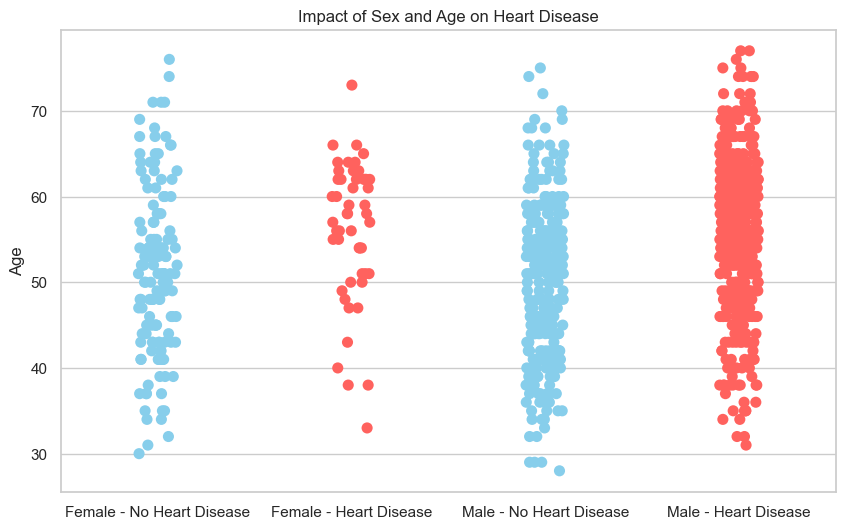

In [20]:
df_copy = selected_df.copy()

# Create a new column combining 'Sex' and 'HeartDisease'
df_copy['Sex_HeartDisease'] = df_copy['Sex'] + '_' + df_copy['HeartDisease'].astype(str)

# Define lables
labels = {'M_N': 'Male - No Heart Disease', 'M_Y': 'Male - Heart Disease',
          'F_N': 'Female - No Heart Disease', 'F_Y': 'Female - Heart Disease'}

df_copy = df_copy.sort_values(by='Sex_HeartDisease', ascending=True)
df_copy['Sex_HeartDisease'] = df_copy['Sex_HeartDisease'].replace(labels)

# Define custom colors
colors = {'Male - No Heart Disease': BLUE, 'Male - Heart Disease': RED, 
          'Female - No Heart Disease': BLUE, 'Female - Heart Disease': RED}

# Create a strip plot with custom colors
plt.figure(figsize=(10, 6))
sns.stripplot(x='Sex_HeartDisease', y='Age', data=df_copy, palette=colors, size=8, jitter=True)

plt.title('Impact of Sex and Age on Heart Disease')
plt.xlabel('') 
plt.ylabel('Age')
plt.show()

**Let's dive into each factors**

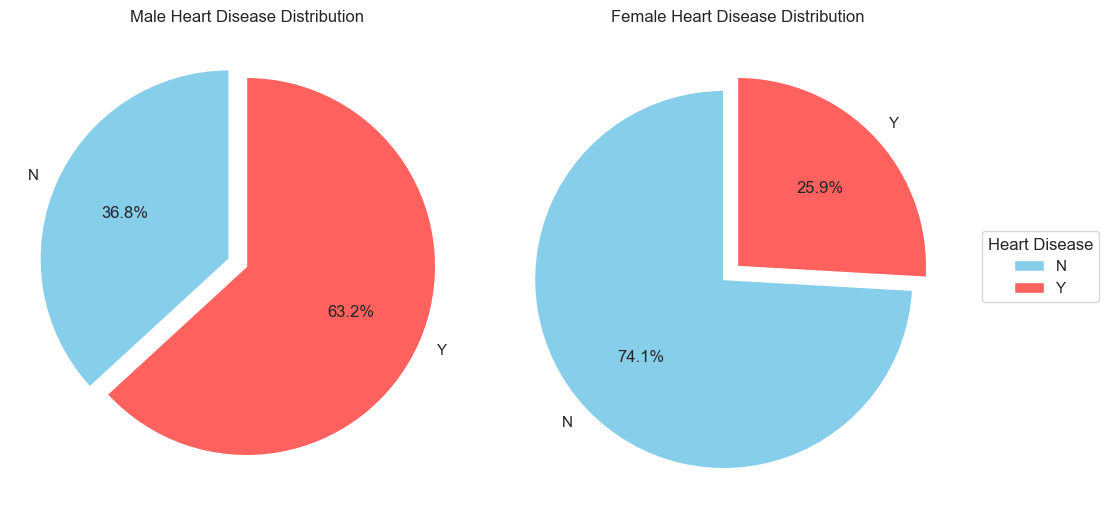

In [21]:
gender_heart_disease_counts = selected_df.groupby(['Sex', 'HeartDisease']).size().unstack().fillna(0)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
colors = [BLUE, RED]

explode = (0.1, 0)
axes[0].pie(gender_heart_disease_counts.loc['M'], labels=gender_heart_disease_counts.columns, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
axes[0].set_title('Male Heart Disease Distribution')

explode = (0.1, 0)
axes[1].pie(gender_heart_disease_counts.loc['F'], labels=gender_heart_disease_counts.columns, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
axes[1].set_title('Female Heart Disease Distribution')

plt.tight_layout()
plt.legend(gender_heart_disease_counts.columns, title='Heart Disease', bbox_to_anchor=(1, 0.5), loc='center left')
plt.show()

- Among individuals with heart disease:
  + Male: 63.2% have heart disease.
  + Female: 25.9% have heart disease.

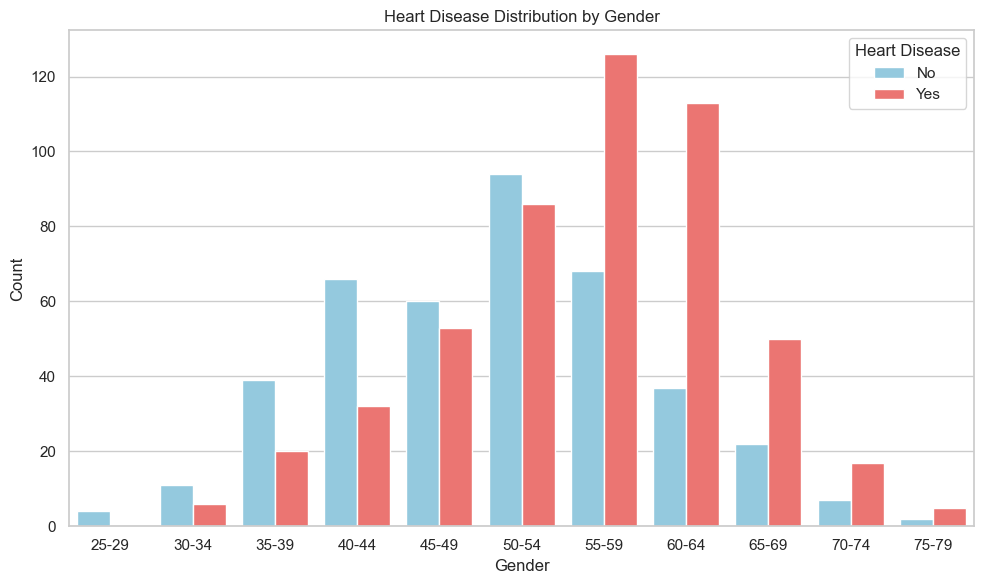

In [22]:
custom_palette = {"N": BLUE, "Y": RED}

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.countplot(x="AgeGroup", hue="HeartDisease", data=age_grouped_df, palette=custom_palette)

plt.title('Heart Disease Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

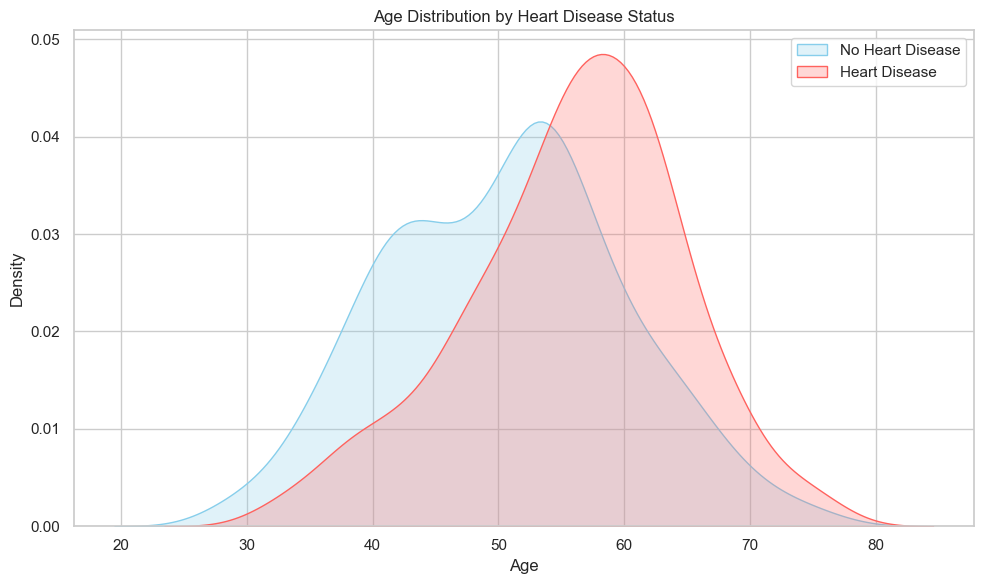

In [23]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

sns.kdeplot(x=selected_df[selected_df['HeartDisease'] == 'N']['Age'], color=custom_palette['N'], label='No Heart Disease', fill=True)
sns.kdeplot(x=selected_df[selected_df['HeartDisease'] == 'Y']['Age'], color=custom_palette['Y'], label='Heart Disease', fill=True)

plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()

- The distribution of age for individuals with heart disease is higher in the 55+ age group.

**&rarr; Answer the question:** How does the incidence of heart disease vary across different age groups and genders?

**Gender Distribution:**

- Among individuals with heart disease, the data shows a higher prevalence among males (63.2%) compared to females (25.9%). This suggests a notable gender disparity in the incidence of heart disease in the dataset, with males being more affected.

**Age Distribution:**

- The age distribution indicates a higher prevalence of heart disease in the 55+ age group. This implies that as age increases, the likelihood of having heart disease also increases. Therefore, heart disease appears to be more prevalent among older individuals.

### **b. Question 2** <a name="question2"></a>

#### **Preprocessing Data**

Since we are considering the impact of factors directly related to blood and circulatory system, we will select out the related features for further analysis. These factors include: `RestingBP`, `Cholesterol`, `FastingBS`, `MaxHR`; and `HeartDisease` for evaluation.

In [24]:
selected_features = ['RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR']
selected_df = df[selected_features + ['HeartDisease']].copy()
selected_df.head()

,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease
0,140,289,N,172,N
1,160,180,N,156,Y
2,130,283,N,98,N
3,138,214,N,108,Y
4,150,195,N,122,N


Reformat `FastingBS` value to 0 and 1 for visualization.

In [25]:
selected_df['FastingBS'] = selected_df['FastingBS'].map({'N': 0, 'Y': 1})

Replace 0 outlier with median value in `RestingBP` since that's probably a missing data.

In [26]:
median_resting_bp = selected_df[selected_df['RestingBP'] != 0]['RestingBP'].median()
selected_df['RestingBP'] = selected_df['RestingBP'].replace(0, median_resting_bp)

#### **Analyzing Data**

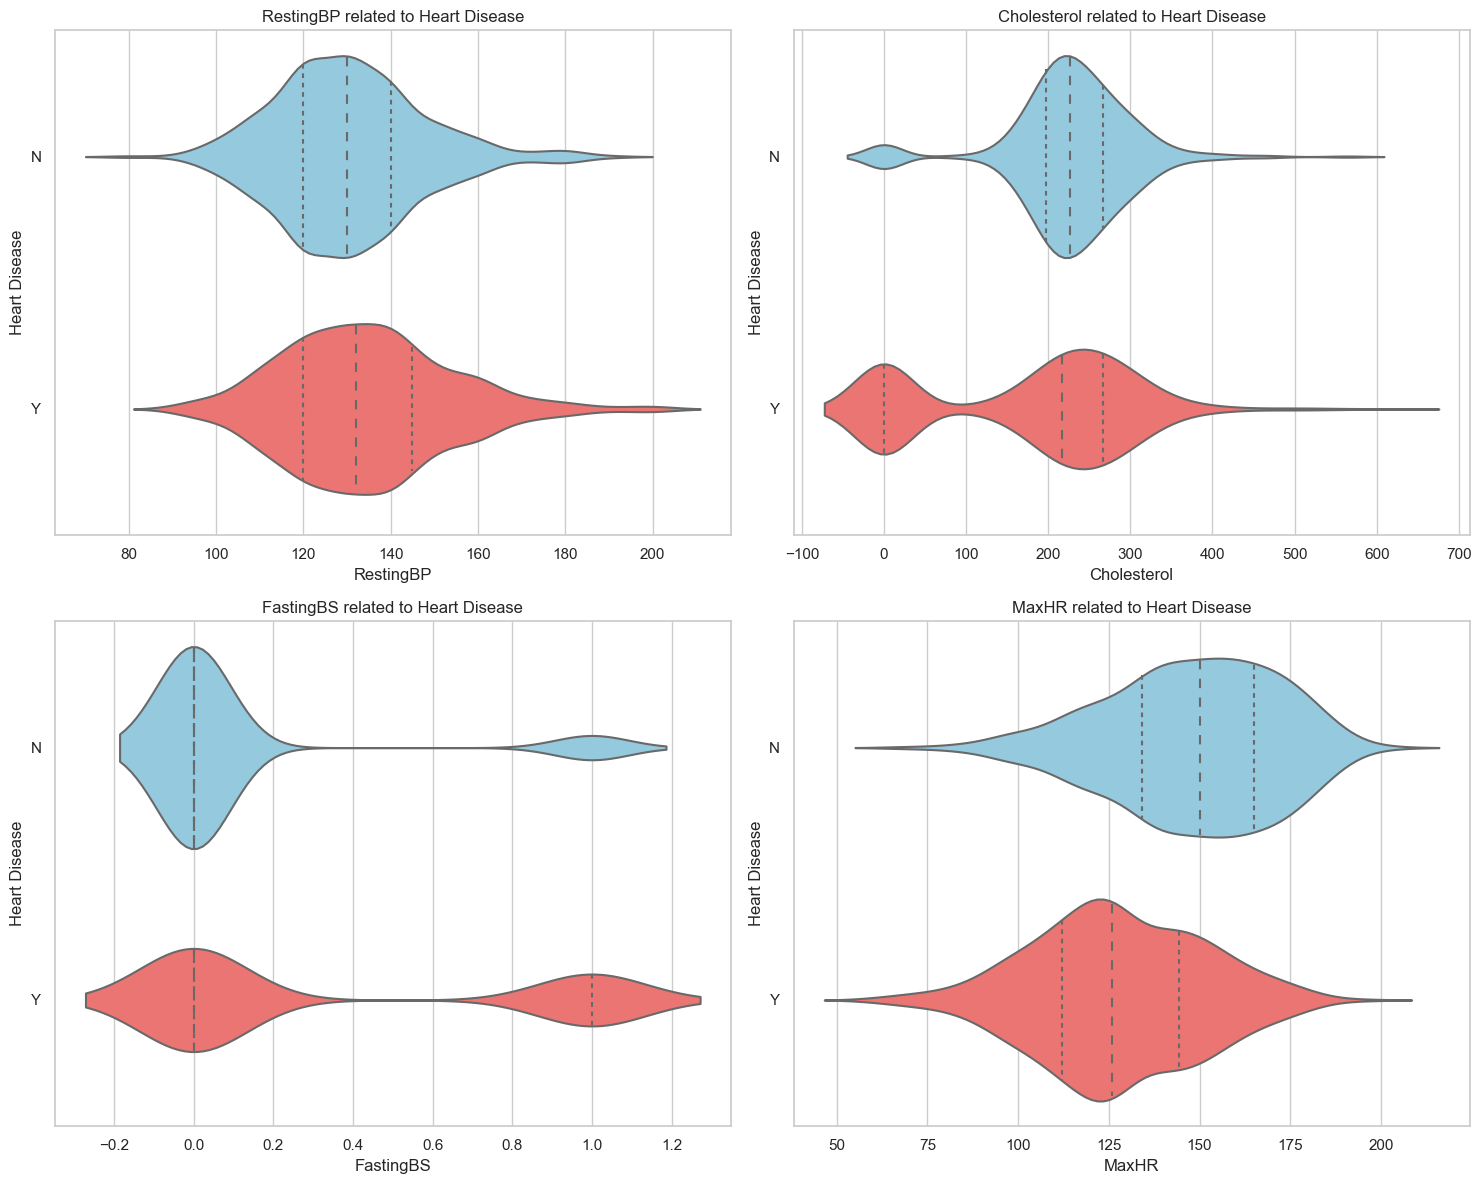

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 12))

for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x=feature, y="HeartDisease", data=selected_df, palette=custom_palette, inner="quartile", legend=False)
    plt.title(f'{feature} related to Heart Disease')
    plt.xlabel(feature)
    plt.ylabel('Heart Disease')

plt.tight_layout()
plt.show()

From the visual analysis of the presented plots:

- Regarding the `Resting Blood Pressure` factor, the distributions of values exhibit similarity, with little distinction in the median and lower quartile. However, a subtle difference is noticeable in the upper quartile, suggesting that higher resting blood pressure might contribute to the likelihood of heart disease.

- Examining the `Cholesterol` feature, it appears that there are potential outliers, possibly influenced by missing values. Excluding these outliers, there is not a significant disparity in median values between the two classes. This suggests that cholesterol may not strongly impact the occurrence of heart disease in this dataset.

- Analyzing `Fasting Blood Sugar`, observations reveal a higher frequency of value 1 in patients with heart disease and more occurrences of value 0 in patients without heart issues. This implies that fasting blood sugar levels exceeding 120 mg/dl are more prevalent among individuals with heart diseases.

- Notably, there is a substantial divergence in the distribution of `MaxHR` between patients with and without heart disease. Patients with heart disease tend to have lower maximum heart rates, with a median around 125. Conversely, those with a healthy heart exhibit a median around 150. This difference is particularly pronounced in the lower quartile which is around 130, even greater than 125, emphasizing that a lower maximum heart rate may be a significant contributing factor to predicting heart disease.

**Training model for evaluate feature importance**

Eliminating rows where Cholesterol equals 0 due to their outlier nature.

In [28]:
selected_df = selected_df[selected_df['Cholesterol'] != 0]
print(selected_df.shape)
selected_df.head()

(746, 5)


,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease
0,140,289,0,172,N
1,160,180,0,156,Y
2,130,283,0,98,N
3,138,214,0,108,Y
4,150,195,0,122,N


In [29]:
X = selected_df.drop('HeartDisease', axis=1)
y = selected_df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Evaluate the model on the testing set
y_pred = rf_classifier.predict(X_test)

# Classification report
class_report = classification_report(y_test, y_pred, output_dict=True)
df_classification_report = pd.DataFrame(class_report).transpose()
df_classification_report

,precision,recall,f1-score,support
N,0.641026,0.704225,0.671141,71.000000
Y,0.708333,0.645570,0.675497,79.000000
accuracy,0.673333,0.673333,0.673333,0.673333
macro avg,0.674679,0.674897,0.673319,150.000000
weighted avg,0.676474,0.673333,0.673435,150.000000


In [31]:
# Print feature importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_classifier.feature_importances_})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
feature_importances_df

,Feature,Importance
3,MaxHR,0.401577
1,Cholesterol,0.340997
0,RestingBP,0.223184
2,FastingBS,0.034242


- MaxHR has the highest importance score among the selected features, indicating its significant role in predicting heart disease. 
- Cholesterol is the second most important feature, contributing substantially to the model's predictions. 
- RestingBP is moderately important, contributing less than Cholesterol and MaxHR but still making a substantial impact. 
- FastingBS has the lowest importance among the selected features, suggesting it has a relatively smaller influence on the model's predictions.

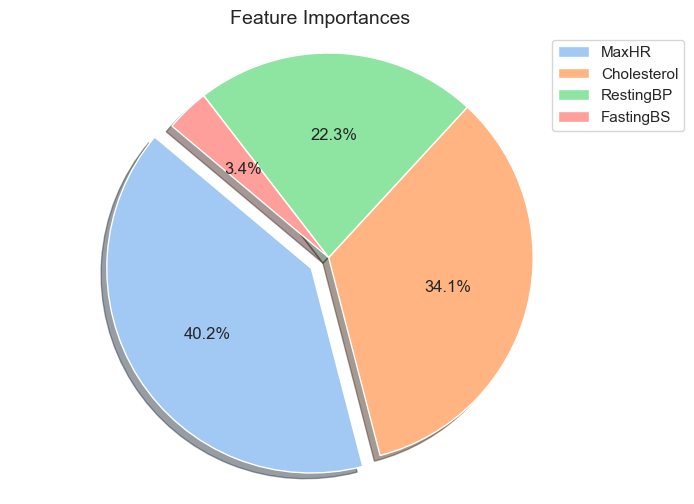

In [32]:
# Plotting a pie chart 
colors = sns.color_palette("pastel", n_colors=len(feature_importances_df))
explode = [0.1 if i == 0 else 0 for i in range(len(feature_importances_df))] 

plt.figure(figsize=(8, 6))
plt.pie(feature_importances_df['Importance'], autopct='%1.1f%%',
        startangle=140, colors=colors, explode=explode, shadow=True)

plt.legend(feature_importances_df['Feature'], loc='upper right', bbox_to_anchor=(1.1, 1))
plt.title('Feature Importances', fontsize=14)
plt.axis('equal')
plt.show()

**&rarr; Answer the question:** Analyze the impact of factors directly related to blood and circulatory system on the risk of developing heart disease. Among these factors, which one has a significant influence and needs to be prioritized?

Among the factors directly related to the blood and circulatory system, **Maximum Heart Rate (MaxHR)** emerges as the most influential and significant predictor of heart disease. Both visual analysis and model importance highlight the pronounced impact of MaxHR on the risk of developing heart disease. Therefore, MaxHR should be prioritized when assessing and addressing the risk of heart disease in individuals.

## **5. Reflection** <a name="reflection"></a>

### **a. What difficulties have you encountered?**

- **Le Anh Thu:**  I had difficulty choosing topics and data because I found everything interesting, but the choice needed to be meaningful and suitable for the group. Understanding features values also requires time to read and understand medical terms in general and heart failure in particular.

- **Huynh Duc Thien:** This project can be described as challenging but has provided us with many new experiences. The data preprocessing phase is a crucial stage, and fortunately, the data this time is relatively clean. However, a lack of domain knowledge has prevented us from evaluating some unusual aspects of the data. In the Exploratory Data Analysis (EDA) phase, it was an adventure with Matplotlib and Seaborn. I had to learn a lot about how to use these libraries for visualization and choose the right visualization methods that convey the intended meaning to the reader, which is also a challenging and attention-demanding task.

### **b. What have you learned?**

- **Le Anh Thu:** My journey has been a trove of knowledge acquisition in the realms of medicine and heart disease. I've cultivated the ability to interpret and comprehend data, formulating practical inquiries from complex datasets. Additionally, a profound realization dawned upon me regarding the pivotal role of adept data visualization in augmenting the efficacy of our exploration.

- **Huynh Duc Thien:** This project not only helped me improve my skills in data processing, visualization, and applying models to answer questions, but it also provided new knowledge in the field of data science. Moreover, it has imparted practical insights into real-life aspects, specifically in the realm of cardiovascular health and circulatory systems. This has contributed to the development of my personal knowledge system, extending beyond the technical aspects of the project to encompass real-world implications and insights into cardiovascular and circulatory health.

### **c. If you had more time, what would you do?**

- If we had more time, our aspiration would be to infuse practicality into our project by constructing an API. This envisioned platform would empower users to input personal body information, facilitating predictions and offering tailored health advice. This proactive approach aims to not only enhance user-friendliness but also actively contribute to the preservation of individual health.

- Furthermore, we have the opportunity to develop a mobile application that can be paired with a wearable device. This app would continuously monitor the user's health information, offering real-time insights and a comprehensive overview of their health metrics. In critical situations, this data could be promptly shared with healthcare providers or emergency services.

## **References** <a name="references"></a>

- Slides and lectures in Programming for Data Science course by Teacher Pham Trong Nghia
- Practice labs by Teacher Tran Quoc Huy
- Heart Failure [Dataset](#https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)
- Understand Heart Disease with this [article](#https://www.medicalnewstoday.com/articles/237191)
- Plot any charts with [matplotlib](#https://matplotlib.org/stable/gallery/index.html#examples-index)
- Better statistical graphics in [seaborn](#https://seaborn.pydata.org/tutorial/introduction.html)